## Location Recommendation for Jadeite Jade Jewelry Store in St. Louis County, MO, United States

#### Importing libraries I will need in the analysis.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import json
import requests
%matplotlib inline
from pandas import ExcelWriter
from pandas import ExcelFile
!pip install watson-developer-cloud==1.5
!pip install xlrd

#### Importing data of St. Louis County Municipalities and checking data format with head statement

In [2]:
dfcodes=pd.read_csv('codes1.csv')
dfcodes.head()

,Zipcode,City,County
0,63005,Chesterfield,St. Louis County
1,63006,Chesterfield,St. Louis County
2,63011,Ballwin,St. Louis County
3,63017,Chesterfield,St. Louis County
4,63021,Ballwin,St. Louis County


#### Changing Column name to match the next dataset I import with lat and long coordingates

In [3]:
dfcodes.columns = ['Postcode', 'Municipality', 'County']
dfcodes.head()

,Postcode,Municipality,County
0,63005,Chesterfield,St. Louis County
1,63006,Chesterfield,St. Louis County
2,63011,Ballwin,St. Louis County
3,63017,Chesterfield,St. Louis County
4,63021,Ballwin,St. Louis County


In [4]:
dfcodes.shape

(85, 3)

#### Importing dataset with all postcodes in the United States

In [5]:
df_coord=pd.read_csv('USdata.csv')
df_coord.head()

,Postcode,Neighbourhood,Borough,Latitude,Longitude
0,501,Holtsville,NY,40.81,-73.04
1,544,Holtsville,NY,40.81,-73.04
2,601,Adjuntas,PR,18.16,-66.72
3,602,Aguada,PR,18.38,-67.18
4,603,Aguadilla,PR,18.43,-67.15


#### Getting all postcodes in the state of Missouri

In [6]:
df_MO = df_coord[df_coord.Borough == 'MO'].reset_index(drop=True)
df_MO.shape

(1173, 5)

In [7]:
df_MO.head()

,Postcode,Neighbourhood,Borough,Latitude,Longitude
0,63001,Allenton,MO,38.50,-90.67
1,63005,Chesterfield,MO,38.65,-90.58
2,63006,Chesterfield,MO,38.65,-90.58
3,63010,Arnold,MO,38.42,-90.36
4,63011,Ballwin,MO,38.60,-90.56


#### Combine dataframes with the same zip codes in MO with the ones in St. Louis County

In [8]:
left = dfcodes
right = df_MO
df_merged=pd.merge(left, right, on='Postcode')
df_merged

,Postcode,Municipality,County,Neighbourhood,Borough,Latitude,Longitude
0,63005,Chesterfield,St. Louis County,Chesterfield,MO,38.65,-90.58
1,63006,Chesterfield,St. Louis County,Chesterfield,MO,38.65,-90.58
2,63011,Ballwin,St. Louis County,Ballwin,MO,38.60,-90.56
3,63017,Chesterfield,St. Louis County,Chesterfield,MO,38.65,-90.53
4,63021,Ballwin,St. Louis County,Ballwin,MO,38.59,-90.55
5,63022,Ballwin,St. Louis County,Ballwin,MO,38.59,-90.55
6,63024,Ballwin,St. Louis County,Ballwin,MO,38.59,-90.55
7,63025,Eureka,St. Louis County,Eureka,MO,38.50,-90.64
8,63026,Fenton,St. Louis County,Fenton,MO,38.53,-90.45
9,63031,Florissant,St. Louis County,Florissant,MO,38.79,-90.32


In [9]:
df_merged['Postcode'] = df_merged['Postcode'].astype(str)

#### Getting Coordinates of the state of Missouri (MO), United States

In [10]:
!pip install geopy
import geopy
from geopy.geocoders import Nominatim
loc = 'Missouri,US'

geolocator = Nominatim(user_agent="MO_explorer")
MO = geolocator.geocode(loc)
MO_lat = MO.latitude
MO_long = MO.longitude
print('The geograpical coordinate of the state of Missouri, US are {}, {}.'.format(MO_lat, MO_long))

The geograpical coordinate of the state of Missouri, US are 38.7604815, -92.5617875.


#### Installing features needed for mapping, segmenting, and clustering.

In [11]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


#### Creating map of Missouri showing locations of each postcode in St. Louis County
#### Please move map to the east if the blue dots do not show up.

In [12]:
MO_map = folium.Map(location = [MO_lat, MO_long], zoom_start = 10)

for lat, lng, label in zip(df_merged.Latitude, 
                           df_merged.Longitude, 
                           df_merged.Postcode):
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        popup = label,
        color = 'blue',
        fill = True).add_to(MO_map)  
    
MO_map



#### Defining Foursquare Version and Credentials for getting venue information and clustering

In [50]:
CLIENT_ID = 'E42LDN2XXZVTYKH3KDJ4II1AURP4DYGRY3343X41UNEX4340' # your Foursquare ID
CLIENT_SECRET = 'IGSUKCJ1CLR4SPE0PFJU0OBPCKXI03MJNQHTTCQQJEV50NEX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: E42LDN2XXZVTYKH3KDJ4II1AURP4DYGRY3343X41UNEX4340
CLIENT_SECRET:IGSUKCJ1CLR4SPE0PFJU0OBPCKXI03MJNQHTTCQQJEV50NEX


# Creating the GET request URL
## Getting venues for all Postcodes in St. Louis County; dataframe: df_merged

In [14]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius
            
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Postcode', 
                  'Postcode Latitude', 
                  'Postcode Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues) 

#### Running the code for the above function on the DF: df_merged and getting a new DF called MO_venues

In [51]:
LIMIT = 100
MO_venues = getNearbyVenues(names = df_merged.Postcode, 
                               latitudes = df_merged.Latitude, 
                               longitudes = df_merged.Longitude)

63005
63006
63011
63017
63021
63022
63024
63025
63026
63031
63032
63033
63034
63038
63040
63042
63043
63044
63045
63074
63088
63099
63101
63102
63103
63104
63105
63105
63106
63107
63108
63109
63110
63111
63112
63113
63114
63114
63115
63116
63117
63118
63119
63120
63121
63122
63123
63124
63125
63126
63127
63128
63129
63130
63131
63131
63132
63133
63134
63135
63136
63137
63138
63139
63140
63140
63141
63143
63144
63145
63146
63147
63151
63155
63156
63157
63158
63163
63166
63167
63169
63177
63178
63179
63188


#### Checking shape and format of new dataframe to see how the function above worked.

In [52]:
print(MO_venues.shape)
MO_venues.head()

(665, 7)


,Postcode,Postcode Latitude,Postcode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,63005,38.65,-90.58,Baxter Crossing tennis Court,38.650425,-90.580583,Tennis Court
1,63005,38.65,-90.58,Ashley's Car,38.649168,-90.581819,Moving Target
2,63005,38.65,-90.58,Baxter Crossings Shell Pool,38.651702,-90.581077,Pool
3,63005,38.65,-90.58,Baxter Clubhouse Pool,38.651703,-90.581193,Pool
4,63005,38.65,-90.58,The Viper Room,38.649407,-90.582407,Lounge


#### Seeing how many venues are in each postcode

In [53]:
MO_venues.groupby('Postcode').count()

,Postcode Latitude,Postcode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Postcode,,,,,,
63005,7,7,7,7,7,7
63006,7,7,7,7,7,7
63011,4,4,4,4,4,4
63017,3,3,3,3,3,3
63021,11,11,11,11,11,11
63022,11,11,11,11,11,11
63024,11,11,11,11,11,11
63025,2,2,2,2,2,2
63031,6,6,6,6,6,6


#### Seeing how many unique categories of venues there are before we look at venues in each postcode

In [54]:
print('There are {} uniques categories.'.format(len(MO_venues['Venue Category'].unique())))

There are 165 uniques categories.


#### Analyzing each postcode

In [58]:
MO_onehot = pd.get_dummies(MO_venues[['Venue Category']], prefix="", prefix_sep="")

# add municipality column back to dataframe
MO_onehot['Postcode'] = MO_venues['Postcode'] 

# move municipality column to the first column
fixed_columns = [MO_onehot.columns[-1]] + list(MO_onehot.columns[:-1])
MO_onehot = MO_onehot[fixed_columns]

MO_onehot.head()

,Postcode,ATM,Accessories Store,Advertising Agency,Airport Gate,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Bus Line,Bus Station,Business Service,Cafeteria,Café,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Administrative Building,College Auditorium,College Cafeteria,College Theater,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Dog Run,Donut Shop,Event Space,Farm,Fast Food Restaurant,Festival,Fish & Chips Shop,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden Center,Gas Station,Gastropub,Gay Bar,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,Historic Site,Home Service,Hot Dog Joint,Hotel,Ice Cream Shop,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Laundromat,Lawyer,Library,Light Rail Station,Lounge,Mediterranean Restaurant,Mexican Restaurant,Mobile Phone Shop,Motel,Movie Theater,Moving Target,Music Store,Music Venue,New American Restaurant,Nightclub,Optical Shop,Outdoor Sculpture,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pizza Place,Playground,Plaza,Pool,Pub,Record Shop,Rental Car Location,Restaurant,Rock Club,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shop & Service,Skating Rink,Smoke Shop,Soccer Field,Southern / Soul Food Restaurant,Speakeasy,Sports Bar,Sports Club,Steakhouse,Storage Facility,Supermarket,Surf Spot,Sushi Restaurant,Taco Place,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Trail,Video Store,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio,Zoo
0,63005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,63005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,63005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,63005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,63005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Grouping rows by postcode and getting means of frequency of each venue category.

In [57]:
MO_group = MO_onehot.groupby('Postcode').mean().reset_index()
MO_group

,Postcode,ATM,Accessories Store,Advertising Agency,Airport Gate,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Bus Line,Bus Station,Business Service,Cafeteria,Café,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Administrative Building,College Auditorium,College Cafeteria,College Theater,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Dance Studio,Deli / Bodega,Dessert Shop,Diner,Disc Golf,Discount Store,Dive Bar,Dog Run,Donut Shop,Event Space,Farm,Fast Food Restaurant,Festival,Fish & Chips Shop,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden Center,Gas Station,Gastropub,Gay Bar,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,Historic Site,Home Service,Hot Dog Joint,Hotel,Ice Cream Shop,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Laundromat,Lawyer,Library,Light Rail Station,Lounge,Mediterranean Restaurant,Mexican Restaurant,Mobile Phone Shop,Motel,Movie Theater,Moving Target,Music Store,Music Venue,New American Restaurant,Nightclub,Optical Shop,Outdoor Sculpture,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pizza Place,Playground,Plaza,Pool,Pub,Record Shop,Rental Car Location,Restaurant,Rock Club,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shop & Service,Skating Rink,Smoke Shop,Soccer Field,Southern / Soul Food Restaurant,Speakeasy,Sports Bar,Sports Club,Steakhouse,Storage Facility,Supermarket,Surf Spot,Sushi Restaurant,Taco Place,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Trail,Video Store,Whisky Bar,Wine Bar,Wings Joint,Women's Store,Yoga Studio,Zoo
0,63005,0.000000,0.00,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.000,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.428571,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.142857,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00
1,63006,0.000000,0.00,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.000000,0.00000

In [59]:
MO_group.shape

(71, 166)

#### Printing out each neighborhood with its top 5 types of venues.

In [60]:
MO_group['Postcode'] = MO_group['Postcode'].astype(str)

num_top_venues = 5

for hood in MO_group['Postcode']:
    print("----"+hood+"----")
    temp = MO_group[MO_group['Postcode'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----63005----
           venue  freq
0           Pool  0.43
1   Concert Hall  0.14
2         Lounge  0.14
3   Tennis Court  0.14
4  Moving Target  0.14


----63006----
           venue  freq
0           Pool  0.43
1   Concert Hall  0.14
2         Lounge  0.14
3   Tennis Court  0.14
4  Moving Target  0.14


----63011----
              venue  freq
0      Home Service  0.25
1  Insurance Office  0.25
2       Coffee Shop  0.25
3        Restaurant  0.25
4               ATM  0.00


----63017----
                           venue  freq
0                  Moving Target  0.33
1                      Surf Spot  0.33
2                      Nightclub  0.33
3                            ATM  0.00
4  Paper / Office Supplies Store  0.00


----63021----
                 venue  freq
0       Sandwich Place  0.18
1       Ice Cream Shop  0.09
2                 Bank  0.09
3  Rental Car Location  0.09
4   Salon / Barbershop  0.09


----63022----
                 venue  freq
0       Sandwich Place  0.18
1       

#### Sort in Descending order before a new dataframe

In [61]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


In [62]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Postcode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Municipalities_venues_sorted = pd.DataFrame(columns=columns)
Municipalities_venues_sorted['Postcode'] = MO_group['Postcode']

for ind in np.arange(MO_group.shape[0]):
    Municipalities_venues_sorted.iloc[ind, 1:] = return_most_common_venues(MO_group.iloc[ind, :], num_top_venues)

Municipalities_venues_sorted

,Postcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,63005,Pool,Tennis Court,Concert Hall,Lounge,Moving Target,Zoo,Event Space,Donut Shop,Dog Run,Dive Bar
1,63006,Pool,Tennis Court,Concert Hall,Lounge,Moving Target,Zoo,Event Space,Donut Shop,Dog Run,Dive Bar
2,63011,Home Service,Coffee Shop,Insurance Office,Restaurant,Zoo,Diner,Farm,Event Space,Donut Shop,Dog Run
3,63017,Surf Spot,Moving Target,Nightclub,Zoo,Discount Store,Farm,Event Space,Donut Shop,Dog Run,Dive Bar
4,63021,Sandwich Place,Salon / Barbershop,Shipping Store,Flower Shop,Cosmetics Shop,Ice Cream Shop,Baseball Field,Rental Car Location,Sushi Restaurant,Bank
5,63022,Sandwich Place,Salon / Barbershop,Shipping Store,Flower Shop,Cosmetics Shop,Ice Cream Shop,Baseball Field,Rental Car Location,Sushi Restaurant,Bank
6,63024,Sandwich Place,Salon / Barbershop,Shipping Store,Flower Shop,Cosmetics Shop,Ice Cream Shop,Baseball Field,Rental Car Location,Sushi Restaurant,Bank
7,63025,Park,Golf Course,Diner,Fast Food Restaurant,Farm,Event Space,Donut Shop,Dog Run,Dive Bar,Discount Store
8,63031,Diner,Construction & Landscaping,Bowling Alley,Ice Cream Shop,Donut Shop,Dessert Shop,Discount Store,Fast Food Restaurant,Farm,Event Space
9,63032,Diner,Construction & Landscaping,Bowling Alley,Ice Cream Shop,Donut Shop,Dessert Shop,Discount Store,Fast Food Restaurant,Farm,Event Space


#### Elbow method to determine number of K's to use in K-means clustering.

#### Optimal K-number is 2 or 3.  I will use 3 to better segment the large area.
## Starting Clustering Process.

Text(0.5, 1.0, 'Elbow curve')

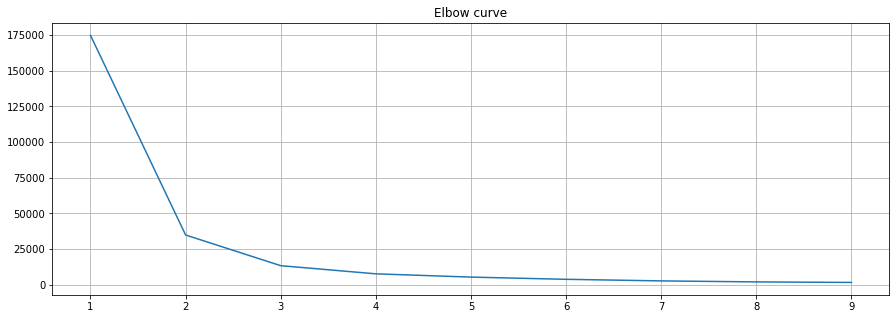

In [49]:
# determine k using elbow method

from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

X = MO_group
distorsions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 10), distorsions)
plt.grid(True)
plt.title('Elbow curve')


#### Clustering using K-means

In [63]:
# set number of clusters
kclusters = 3

MO_group_clustering = MO_group.drop('Postcode', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(MO_group_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:3] 

array([1, 1, 1], dtype=int32)

#### and Adding clustering labels.

In [64]:
Municipalities_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

#### New dataframe for clusters and top 10 venues in each postcode.

In [65]:

df_merged2 = df_merged.join(Municipalities_venues_sorted.set_index('Postcode'), on='Postcode')

df_merged2

,Postcode,Municipality,County,Neighbourhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,63005,Chesterfield,St. Louis County,Chesterfield,MO,38.65,-90.58,1.0,Pool,Tennis Court,Concert Hall,Lounge,Moving Target,Zoo,Event Space,Donut Shop,Dog Run,Dive Bar
1,63006,Chesterfield,St. Louis County,Chesterfield,MO,38.65,-90.58,1.0,Pool,Tennis Court,Concert Hall,Lounge,Moving Target,Zoo,Event Space,Donut Shop,Dog Run,Dive Bar
2,63011,Ballwin,St. Louis County,Ballwin,MO,38.60,-90.56,1.0,Home Service,Coffee Shop,Insurance Office,Restaurant,Zoo,Diner,Farm,Event Space,Donut Shop,Dog Run
3,63017,Chesterfield,St. Louis County,Chesterfield,MO,38.65,-90.53,1.0,Surf Spot,Moving Target,Nightclub,Zoo,Discount Store,Farm,Event Space,Donut Shop,Dog Run,Dive Bar
4,63021,Ballwin,St. Louis County,Ballwin,MO,38.59,-90.55,1.0,Sandwich Place,Salon / Barbershop,Shipping Store,Flower Shop,Cosmetics Shop,Ice Cream Shop,Baseball Field,Rental Car Location,Sushi Restaurant,Bank
5,63022,Ballwin,St. Louis County,Ballwin,MO,38.59,-90.55,1.0,Sandwich Place,Salon / Barbershop,Shipping Store,Flower Shop,Cosmetics Shop,Ice Cream Shop,Baseball Field,Rental Car Location,Sushi Restaurant,Bank
6,63024,Ballwin,St. Louis County,Ballwin,MO,38.59,-90.55,1.0,Sandwich Place,Salon / Barbershop,Shipping Store,Flower Shop,Cosmetics Shop,Ice Cream Shop,Baseball Field,Rental Car Location,Sushi Restaurant,Bank
7,63025,Eureka,St. Louis County,Eureka,MO,38.50,-90.64,1.0,Park,Golf Course,Diner,Fast Food Restaurant,Farm,Event Space,Donut Shop,Dog Run,Dive Bar,Discount Store
8,63026,Fenton,St. Louis County,Fenton,MO,38.53,-90.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,63031,Florissant,St. Louis County,Florissant,MO,38.79,-90.32,1.0,Diner,Construction & Landscaping,Bowling Alley,Ice Cream Shop,Donut Shop,Dessert Shop,Discount Store,Fast Food Restaurant,Farm,Event Space


#### Merge df to add latitude and longitude for each postcode.

#### Removing NAN values for four cluster labels that returned no cluster number or venues and changing cluster labels column to type int.

In [66]:
df_merged2.dropna(subset=['Cluster Labels'], inplace = True)
df_merged2.head()

,Postcode,Municipality,County,Neighbourhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,63005,Chesterfield,St. Louis County,Chesterfield,MO,38.65,-90.58,1.0,Pool,Tennis Court,Concert Hall,Lounge,Moving Target,Zoo,Event Space,Donut Shop,Dog Run,Dive Bar
1,63006,Chesterfield,St. Louis County,Chesterfield,MO,38.65,-90.58,1.0,Pool,Tennis Court,Concert Hall,Lounge,Moving Target,Zoo,Event Space,Donut Shop,Dog Run,Dive Bar
2,63011,Ballwin,St. Louis County,Ballwin,MO,38.60,-90.56,1.0,Home Service,Coffee Shop,Insurance Office,Restaurant,Zoo,Diner,Farm,Event Space,Donut Shop,Dog Run
3,63017,Chesterfield,St. Louis County,Chesterfield,MO,38.65,-90.53,1.0,Surf Spot,Moving Target,Nightclub,Zoo,Discount Store,Farm,Event Space,Donut Shop,Dog Run,Dive Bar
4,63021,Ballwin,St. Louis County,Ballwin,MO,38.59,-90.55,1.0,Sandwich Place,Salon / Barbershop,Shipping Store,Flower Shop,Cosmetics Shop,Ice Cream Shop,Baseball Field,Rental Car Location,Sushi Restaurant,Bank


#### Creating map showing postcode clusters.
#### Please scroll map to east if the clusters do not show up.

In [67]:
df_merged2['Cluster Labels'] = df_merged2['Cluster Labels'].astype(int)
df_merged2.head()

,Postcode,Municipality,County,Neighbourhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,63005,Chesterfield,St. Louis County,Chesterfield,MO,38.65,-90.58,1,Pool,Tennis Court,Concert Hall,Lounge,Moving Target,Zoo,Event Space,Donut Shop,Dog Run,Dive Bar
1,63006,Chesterfield,St. Louis County,Chesterfield,MO,38.65,-90.58,1,Pool,Tennis Court,Concert Hall,Lounge,Moving Target,Zoo,Event Space,Donut Shop,Dog Run,Dive Bar
2,63011,Ballwin,St. Louis County,Ballwin,MO,38.60,-90.56,1,Home Service,Coffee Shop,Insurance Office,Restaurant,Zoo,Diner,Farm,Event Space,Donut Shop,Dog Run
3,63017,Chesterfield,St. Louis County,Chesterfield,MO,38.65,-90.53,1,Surf Spot,Moving Target,Nightclub,Zoo,Discount Store,Farm,Event Space,Donut Shop,Dog Run,Dive Bar
4,63021,Ballwin,St. Louis County,Ballwin,MO,38.59,-90.55,1,Sandwich Place,Salon / Barbershop,Shipping Store,Flower Shop,Cosmetics Shop,Ice Cream Shop,Baseball Field,Rental Car Location,Sushi Restaurant,Bank


In [48]:
# create map
map_clusters = folium.Map(location=[MO_lat, MO_long], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_merged2['Latitude'], df_merged2['Longitude'], df_merged2['Postcode'], df_merged2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Examining the top 10 most common venues in each cluster.

In [68]:
df_merged2.loc[df_merged2['Cluster Labels'] == 0, df_merged2.columns[[0] + list(range(5, df_merged2.shape[1]))]]

,Postcode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
38,63115,38.68,-90.24,0,Gas Station,Food,Diner,Farm,Event Space,Donut Shop,Dog Run,Dive Bar,Discount Store,Disc Golf
52,63129,38.46,-90.32,0,Food,Italian Restaurant,Disc Golf,Festival,Fast Food Restaurant,Farm,Event Space,Donut Shop,Dog Run,Dive Bar
61,63137,38.75,-90.21,0,Food,Zoo,Disc Golf,Fast Food Restaurant,Farm,Event Space,Donut Shop,Dog Run,Dive Bar,Discount Store


In [69]:
df_merged2.loc[df_merged2['Cluster Labels'] == 1, df_merged2.columns[[0] + list(range(5, df_merged2.shape[1]))]]

,Postcode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,63005,38.65,-90.58,1,Pool,Tennis Court,Concert Hall,Lounge,Moving Target,Zoo,Event Space,Donut Shop,Dog Run,Dive Bar
1,63006,38.65,-90.58,1,Pool,Tennis Court,Concert Hall,Lounge,Moving Target,Zoo,Event Space,Donut Shop,Dog Run,Dive Bar
2,63011,38.60,-90.56,1,Home Service,Coffee Shop,Insurance Office,Restaurant,Zoo,Diner,Farm,Event Space,Donut Shop,Dog Run
3,63017,38.65,-90.53,1,Surf Spot,Moving Target,Nightclub,Zoo,Discount Store,Farm,Event Space,Donut Shop,Dog Run,Dive Bar
4,63021,38.59,-90.55,1,Sandwich Place,Salon / Barbershop,Shipping Store,Flower Shop,Cosmetics Shop,Ice Cream Shop,Baseball Field,Rental Car Location,Sushi Restaurant,Bank
5,63022,38.59,-90.55,1,Sandwich Place,Salon / Barbershop,Shipping Store,Flower Shop,Cosmetics Shop,Ice Cream Shop,Baseball Field,Rental Car Location,Sushi Restaurant,Bank
6,63024,38.59,-90.55,1,Sandwich Place,Salon / Barbershop,Shipping Store,Flower Shop,Cosmetics Shop,Ice Cream Shop,Baseball Field,Rental Car Location,Sushi Restaurant,Bank
7,63025,38.50,-90.64,1,Park,Golf Course,Diner,Fast Food Restaurant,Farm,Event Space,Donut Shop,Dog Run,Dive Bar,Discount Store
9,63031,38.79,-90.32,1,Diner,Construction & Landscaping,Bowling Alley,Ice Cream Shop,Donut Shop,Dessert Shop,Discount Store,Fast Food Restaurant,Farm,Event Space
10,63032,38.79,-90.32,1,Diner,Construction & Landscaping,Bowling Alley,Ice Cream Shop,Donut Shop,Dessert Shop,Discount Store,Fast Food Restaurant,Farm,Event Space


In [70]:
df_merged2.loc[df_merged2['Cluster Labels'] == 2, df_merged2.columns[[0] + list(range(5, df_merged2.shape[1]))]]

,Postcode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
32,63110,38.63,-90.24,2,Lounge,Gay Bar,Light Rail Station,Brewery,Sushi Restaurant,Thrift / Vintage Store,Japanese Restaurant,Gym,Dance Studio,Cosmetics Shop
35,63113,38.66,-90.25,2,Lounge,Restaurant,Zoo,Diner,Farm,Event Space,Donut Shop,Dog Run,Dive Bar,Discount Store
54,63131,38.62,-90.44,2,Garden Center,Lounge,Zoo,Fast Food Restaurant,Farm,Event Space,Donut Shop,Dog Run,Dive Bar,Discount Store
55,63131,38.62,-90.44,2,Garden Center,Lounge,Zoo,Fast Food Restaurant,Farm,Event Space,Donut Shop,Dog Run,Dive Bar,Discount Store
69,63145,38.63,-90.24,2,Lounge,Gay Bar,Light Rail Station,Brewery,Sushi Restaurant,Thrift / Vintage Store,Japanese Restaurant,Gym,Dance Studio,Cosmetics Shop
72,63151,38.63,-90.24,2,Lounge,Gay Bar,Light Rail Station,Brewery,Sushi Restaurant,Thrift / Vintage Store,Japanese Restaurant,Gym,Dance Studio,Cosmetics Shop
74,63156,38.63,-90.24,2,Lounge,Gay Bar,Light Rail Station,Brewery,Sushi Restaurant,Thrift / Vintage Store,Japanese Restaurant,Gym,Dance Studio,Cosmetics Shop
75,63157,38.63,-90.24,2,Lounge,Gay Bar,Light Rail Station,Brewery,Sushi Restaurant,Thrift / Vintage Store,Japanese Restaurant,Gym,Dance Studio,Cosmetics Shop
76,63158,38.63,-90.24,2,Lounge,Gay Bar,Light Rail Station,Brewery,Sushi Restaurant,Thrift / Vintage Store,Japanese Restaurant,Gym,Dance Studio,Cosmetics Shop
77,63163,38.63,-90.24,2,Lounge,Gay Bar,Light Rail Station,Brewery,Sushi Restaurant,Thrift / Vintage Store,Japanese Restaurant,Gym,Dance Studio,Cosmetics Shop
